## Fall 2023

In [1]:

import pandas as pd


employee_data = {
"Employee_ID": [101, 102, 103, 104, 105],
"Name": ["Alice", "Bob", "Charlie", "David", "Emma"],
"Department": ["HR", "Engineering", "Finance", "Engineering", "HR"],
"Salary": [60000, 80000, 75000, 90000, 65000],
"Years_Worked": [2, 5, 3, 7, 1]
}
employees = pd.DataFrame(employee_data)

In [7]:
# Q1
print(employees["Salary"].max())

print(employees.loc[employees['Salary'].idxmax(),"Salary"])

90000
90000


In [10]:
# Q2
print(employees['Department'])
employees["Department"] = employees["Department"].apply(lambda val:
"Tech" if val in ["Engineering"] else "Business")
print(employees['Department'])

0             HR
1    Engineering
2        Finance
3    Engineering
4             HR
Name: Department, dtype: object
0    Business
1        Tech
2    Business
3        Tech
4    Business
Name: Department, dtype: object


In [12]:
movies = pd.DataFrame({
"Movie_ID": [1, 2, 3, 4, 5],
"Title": ["The Matrix", "Inception", "Pulp Fiction",
"The Shawshank Redemption", "The Dark Knight"],
"Genre": ["Action", "Sci-Fi", "Crime", "Drama", "Action"],
"Rating": [4.5, 4.8, 4.2, 4.9, 4.7],
"Year": [1999, 2010, 1994, 1994, 2008],
"Director": ["Wachowskis", "Christopher Nolan", "Quentin Tarantino",
"Frank Darabont", "Christopher Nolan"]
})
movies

Movie_ID                     Title   Genre  Rating  Year           Director
0         1                The Matrix  Action     4.5  1999         Wachowskis
1         2                 Inception  Sci-Fi     4.8  2010  Christopher Nolan
2         3              Pulp Fiction   Crime     4.2  1994  Quentin Tarantino
3         4  The Shawshank Redemption   Drama     4.9  1994     Frank Darabont
4         5           The Dark Knight  Action     4.7  2008  Christopher Nolan

In [13]:
# Q3

type(movies["Genre"].value_counts())

pandas.core.series.Series

In [14]:
# Q4
movies.loc["Pulp Fiction"]["Director"]

KeyError: 'Pulp Fiction'

In [15]:
df = pd.DataFrame([
{"year":1994.0},
{"year":None},
{"year":2004.0}
])
df

year
0  1994.0
1     NaN
2  2004.0

In [17]:
# Q5
df["decade"] = df["year"] // 10 * 10
df

year  decade
0  1994.0  1990.0
1     NaN     NaN
2  2004.0  2000.0

In [18]:
# Q6
df["year"].dropna().astype(int)

0    1994
2    2004
Name: year, dtype: int64

In [21]:
df = pd.DataFrame([
{"year":1994, "decade": 1990},
{"year":None, "decade": None},
{"year":2004, "decade": 2000},
{"year":2008, "decade": 2000}
])
df

year  decade
0  1994.0  1990.0
1     NaN     NaN
2  2004.0  2000.0
3  2008.0  2000.0

In [23]:
# Q7
df["decade"].value_counts().iloc[0]

2

##### Q8
`<a href="https://www.google.com">link</a>`<br>
<a href="https://www.google.com">link</a>

In [25]:
# Q9
import requests

def fetch_data(api_url):
    try:
        response = requests.get(api_url)
        status_code = response.status_code
    except requests.HTTPError as e:
        return None
    if status_code == 200:
        return "Success"
    else:
        return "Not 200"

result = fetch_data("https://example.com/abc123")
print(result)

Not 200


In [26]:
# Q10
import requests

def save_html(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        file = open("web_page.html", "w", encoding="utf-8")
        file.write(response.text) ###SOLUTION LINE  ????
        file.close()
    except requests.HTTPError as e:
        print("WARNING! Could not fetch page")

In [27]:
# Q11
from bs4 import BeautifulSoup
import os

if os.path.exists("web_page.html"):
    file = open("web_page.html")
    html_content = file.read() ###SOLUTION LINE  ????
    soup = BeautifulSoup(html_content, "html.parser")
    link = soup.find("a")
    file.close()

In [31]:
# Q12

# import requests
# response = requests.get("https://www.example.com/data.json")
# data_text = response.text
# data_json = response.json()

import json

data_text = '''{"john": 150, "emma": 220, "mike": 180}'''
data_json = json.loads(data_text)

data_json["emma"]  ###SOLUTION LINE

220

In [39]:
# Q13

import sqlite3
import pandas as pd

# companies=pd.DataFrame({
#     'name':['Walmart','Samsung Electronics','Toyota','Amazon','Mercedes Benz','Apple','Volkswagen'],
#     'industry':['Retail','Electronics','Automotive','Retail','Automotive','Electronics','Automotive'],
#     'headquarters':['USA','South Korea','Japan','USA','Germany','USA','Germany'],
#     'established':[1962,1969,1937,1994,1926,1976,1937]
# })
conn = sqlite3.connect("companies.db")
# companies.to_sql("companies",conn)



companies = pd.read_sql("SELECT * FROM companies", conn)


query = "SELECT * FROM companies WHERE established = 1937" ### SOLUTION
pd.read_sql(query, conn)

index        name    industry headquarters  established
0      2      Toyota  Automotive        Japan         1937
1      6  Volkswagen  Automotive      Germany         1937

In [40]:
# Q14
pd.read_sql("""
SELECT * FROM companies WHERE headquarters = "USA" ORDER BY name ASC
""",conn)

index     name     industry headquarters  established
0      3   Amazon       Retail          USA         1994
1      5    Apple  Electronics          USA         1976
2      0  Walmart       Retail          USA         1962

In [42]:
# Q15
query = """
SELECT headquarters, COUNT(*) AS num_companies
FROM companies
GROUP BY headquarters
HAVING num_companies > 2
ORDER BY num_companies DESC
"""
output = pd.read_sql(query, conn)
output

headquarters  num_companies
0          USA              3

In [43]:
# Q16
pd.read_sql("""
SELECT * FROM companies WHERE headquarters = "USA" AND industry = "Retail" ORDER BY established ASC Limit 1
""",conn)

index     name industry headquarters  established
0      0  Walmart   Retail          USA         1962

In [45]:
# Q17
question_df = pd.read_sql("""
SELECT established, COUNT(*) AS num_companies
FROM companies
GROUP BY established
HAVING num_companies > 1
""", conn)
print(question_df)
len(question_df)

   established  num_companies
0         1937              2


1

In [46]:
# Q18  (the != is what is being tested)
non_usa = pd.read_sql("""
SELECT *
FROM companies
WHERE headquarters != "USA"
""", conn)
non_usa

index                 name     industry headquarters  established
0      1  Samsung Electronics  Electronics  South Korea         1969
1      2               Toyota   Automotive        Japan         1937
2      4        Mercedes Benz   Automotive      Germany         1926
3      6           Volkswagen   Automotive      Germany         1937

#### Q19
**Question asking about differences between `.loc` and `.iloc`**

Answer: loc is primarily used with row and column labels, while iloc is used with
integer positions.

<Axes: xlabel='A', ylabel='C'>

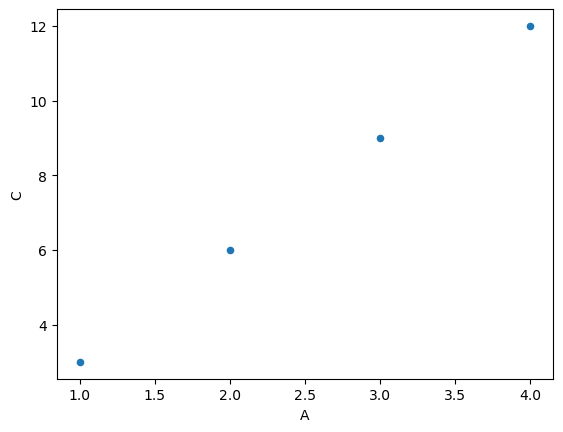

In [47]:
# Q20 - Answer: C A scatter plot with dots that are all the same color

df = pd.DataFrame({"A":[1,2,3,4], "B":[2,7,5,8], "C":[3,6,9,12]})
df.plot.scatter(x="A", y="C")

In [49]:
# Q21 Pandas DOES support pie plots
df.plot.pie(y='A')

<Axes: ylabel='A'>

In [51]:
# Q22
ax = df.plot.bar()
ax.set_xlabel("Hello World")

Text(0.5, 0, 'Hello World')

In [52]:
# Q23

import os

def get_all_paths_in(directory):
    paths = []
    files = os.listdir(directory)
    for file in files:
        if file.startswith("."):
            continue
        path = os.path.join(directory, file)
        if os.path.isfile(path):
            paths.append(path)
        elif os.path.isdir(path):
            paths.extend(get_all_paths_in(path)) ###SOLUTION ????
    return sorted(paths, reverse=True)

In [54]:
# Q24

stars_dict = {
"11 UMi": {"Stellar Mass": 2.78, "Stellar Age": 1.560},
"14 And": {"Stellar Mass": 1.78, "Stellar Age": 4.500},
"CD Cet": {"Stellar Mass": 0.16, "Stellar Age": 3.000},
"mu2 Sco": {"Stellar Mass": 9.1, "Stellar Age": 0.020},
"HD 96127": {"Stellar Mass": 12.94, "Stellar Age": 4.067}
}

star_classes = {
"Red Giant": [],
"White Dwarf": [],
"Neutron Star": []
}

# SOLUTION: < < <= < >=
for star in stars_dict:
    star_info = stars_dict[star]
    mass = star_info["Stellar Mass"]
    if mass == None:
        continue
    if 0.5 < mass < 8:
        star_classes["Red Giant"].append(star)
    elif 8 <= mass < 12:
        star_classes["White Dwarf"].append(star)
    elif mass >= 12:
        star_classes["Neutron Star"].append(star)

star_classes

{'Red Giant': ['11 UMi', '14 And'],
 'White Dwarf': ['mu2 Sco'],
 'Neutron Star': ['HD 96127']}

In [55]:
# Q25
print(stars_dict[star_classes["Neutron Star"][0]]["Stellar Age"])

4.067


In [56]:
# Q26
import csv
import json
import os

def process_csv(filename):
    with open(filename) as file:
        csv_reader = csv.reader(file)
        list_data = list(csv_reader)
        return list_data
        
def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f)
        
def get_planets_data(planet_file, mapping_file):
    mapping_dict = read_json(mapping_file)
    planets_csv = process_csv(planet_file)
    planets_header = planets_csv[0]
    planets_rows = planets_csv[1:]
    return (planets_header, planets_rows, mapping_dict)

# Root
# |
# |-- data
# |      |-- planets1.csv
# |      |-- mappings
# |             |-- mapping1.json
# |
# |-- other_folder

#SOLUTION
# get_planets_data(os.path.join("data", "planets1.csv"),
# os.path.join("data", "mappings", "mapping1.json")

In [59]:
# Q27
data = """
<table>
<thead>
<tr>
<th>Column 1</th>
<th>Column 2</th>
</tr>
</thead>
<tbody>
<tr>
<td>Row 1, Cell 1</td>
<td>Row 1, Cell 2</td>
</tr>
<tr>
<td>Row 2, Cell 1</td>
<td>Row 2, Cell 2</td>
</tr>
</tbody>
</table>
"""

f=open("2023.html",'w')
f.write(data)
f.close()

from bs4 import BeautifulSoup
import pandas as pd

with open("2023.html", "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, "html.parser")
table = soup.find("table")
headers = [val.get_text().strip() for val in table.find("thead").find_all("th")]
headers

['Column 1', 'Column 2']

In [62]:
# Q28
table = soup.find("table")
headers = ["Column 1", "Column 2"]
data = []
rows = table.find_all("tr")
for row in rows[1:]:
    cols = row.find_all("td")
    row_data = {}
    for i in range(len(headers)):
        row_data[headers[i]] = cols[i].get_text() ###SOLUTION ????
    data.append(row_data)

df = pd.DataFrame(data)
df

Column 1       Column 2
0  Row 1, Cell 1  Row 1, Cell 2
1  Row 2, Cell 1  Row 2, Cell 2

In [63]:
# Q29
print(soup.find("a"), soup.find_all("a"))

None []


#### Q30 Primary Difference between `.find()` and `.find_all()`
answer: .find() returns the first match, while .find all() returns a list of
all matches

#### Q31
Assume that all necessary imports have already been made. Please select the answer that
correctly replaces all of the ???? spaces (in top-to-bottom order) as they appear below to
prepare the rankings database:
```
var1 = "rankings.db"
var2 = "rankings"
var3 = "rankings.json"

rankings = pd.read_json(????)
conn = sqlite3.connect(????)
rankings.to_sql(????, conn, if_exists="replace", index=False)
```

Answer: E. var3, var1, var2

In [65]:
# SETUP FOR Q32 and beyond
df = pd.DataFrame({
    'Year':[2022,2022,2022,2021],
    'Institution Name':['University of Tokyo','University of Munich','Kyoto University','Wisconsin-Madison'],
    'Country':['Japan','Germany','Japan','USA'],
    'Fac Student':[7.2, 14.3, 6.5, 15.2],
    'Cit Per Fac':[97.5, 97.2, 96.8, 96.1],
    'International':[99.7, 91.5, 98.9, 83.4]
})
df.to_sql("rankings",conn)

4

In [67]:
# Q32
pd.read_sql("""
SELECT "Institution Name", "Fac Student"
FROM rankings
WHERE Year = 2023 AND Country = "Brazil"
ORDER BY "Fac Student" DESC
LIMIT 10
""",conn)

# NOTE: Prefer double quotes for quoting identifiers, such as column or table names. It's the SQL standard.
# Backticks also work, but they're only supported for MySQL syntax compatibility. Single quotes are for string literals,
# not identifiers. Aug 5, 2014
# https://stackoverflow.com/questions/25141090/use-backticks-or-double-quotes-with-python-and-sqlite#:~:text=Prefer%20double%20quotes%20for%20quoting,for%20string%20literals%2C%20not%20identifiers.

Empty DataFrame
Columns: [Institution Name, Fac Student]
Index: []

In [73]:
# Q33
qry = """
SELECT "International", "Cit Per Fac" FROM rankings

""" # took out this so some data in qry: WHERE "year" = 2020 AND "Country" = "Germany"
pd.read_sql(qry, conn).corr().loc["International"].loc["Cit Per Fac"]

0.7715279808433153

In [74]:
# Q34
qry = """SELECT Country, COUNT(*) AS "Num Institutions" FROM rankings
WHERE Year = 2020 GROUP BY Country ORDER BY "Num Institutions" DESC
LIMIT 5"""
pd.read_sql(qry,conn)

Empty DataFrame
Columns: [Country, Num Institutions]
Index: []

In [75]:
# Q35
qry = """
SELECT ("Fac Student" * "Cit Per Fac") AS "Cit Per Student"
"""


In [76]:
conn.close()